In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('_data/Online_Retail.csv',
                   sep=",", 
                   encoding="ISO-8859-1", 
                   header=0)


In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.isna().sum()/data.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [6]:
drop_data = data.dropna().reset_index(drop=True)

In [7]:
drop_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France


In [8]:
! pip install wordcloud

In [9]:
from wordcloud import WordCloud

In [10]:
Des = ' '.join(drop_data.Description)

In [11]:
stop_words = ['red', 'white', 'of', 'black', 'large', 'pink',
              'set', 'blue', 'with', 'love', 'small', 'in', 'heart']

In [12]:
wc = WordCloud(collocations = False,
               stopwords=stop_words,
               background_color='white').generate(Des.lower())

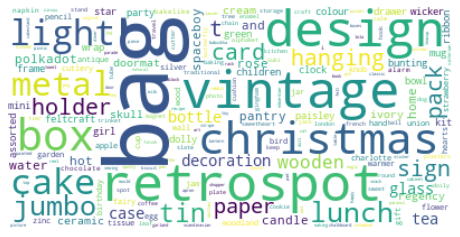

In [13]:
plt.figure(figsize=(8, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

In [14]:
drop_data['TotalPrice'] = drop_data['UnitPrice']*drop_data['Quantity']

In [15]:
drop_data['TotalPrice']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
406824    10.20
406825    12.60
406826    16.60
406827    16.60
406828    14.85
Name: TotalPrice, Length: 406829, dtype: float64

In [16]:
drop_data['InvoiceDate'] = pd.to_datetime(drop_data['InvoiceDate'])

In [17]:
custumer_data = pd.DataFrame({'#invoce': drop_data.groupby('CustomerID')['InvoiceNo'].count(),
'mean_tot_price': drop_data.groupby('CustomerID')['TotalPrice'].mean(),
'sum_tot_price': drop_data.groupby('CustomerID')['TotalPrice'].sum(),
'#item':drop_data.groupby('CustomerID')['StockCode'].nunique(),
'tot_items': drop_data.groupby('CustomerID')['Quantity'].sum(),
'mean_items_per_ivoce': drop_data.groupby('CustomerID')['Quantity'].mean(),
'customer_life_time':drop_data['InvoiceDate'].max() - drop_data.groupby('CustomerID')['InvoiceDate'].min()})

custumer_data['customer_life_time'] = custumer_data['customer_life_time'].dt.days

custumer_data = custumer_data.reset_index()

In [18]:
custumer_data

,CustomerID,#invoce,mean_tot_price,sum_tot_price,#item,tot_items,mean_items_per_ivoce,customer_life_time
0,12346.0,2,0.000000,0.00,1,0,0.000000,326
1,12347.0,182,23.681319,4310.00,103,2458,13.505495,516
2,12348.0,31,57.975484,1797.24,22,2341,75.516129,358
3,12349.0,73,24.076027,1757.55,73,631,8.643836,19
4,12350.0,17,19.670588,334.40,17,197,11.588235,311
...,...,...,...,...,...,...,...,...
4367,18280.0,10,18.060000,180.60,10,45,4.500000,160
4368,18281.0,7,11.545714,80.82,7,54,7.714286,4
4369,18282.0,13,13.584615,176.60,12,98,7.538462,301
4370,18283.0,756,2.771005,2094.88,263,1397,1.847884,321


In [19]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram 

In [20]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

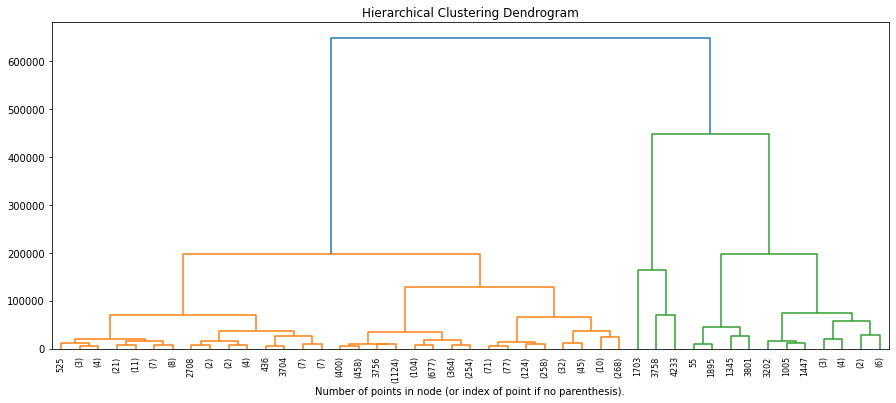

In [21]:
plt.figure(figsize=(15, 6))
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0,
                                n_clusters=None,
                                linkage='ward')

model = model.fit(custumer_data.drop(columns=['CustomerID']))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).");

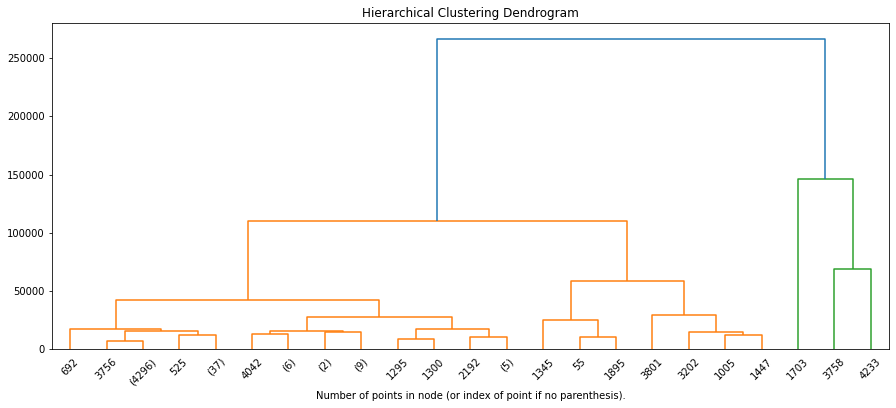

In [22]:
plt.figure(figsize=(15, 6))
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0,
                                n_clusters=None,
                                linkage='average')

model = model.fit(custumer_data.drop(columns=['CustomerID']))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).");

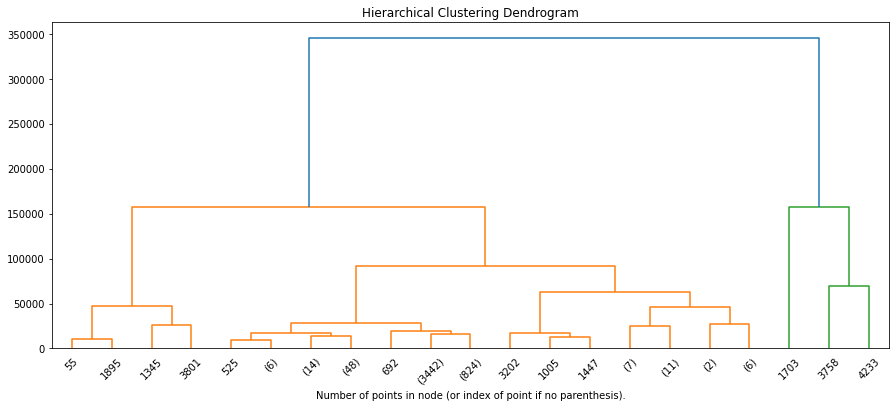

In [23]:
plt.figure(figsize=(15, 6))
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0,
                                n_clusters=None,
                                linkage='complete')

model = model.fit(custumer_data.drop(columns=['CustomerID']))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).");

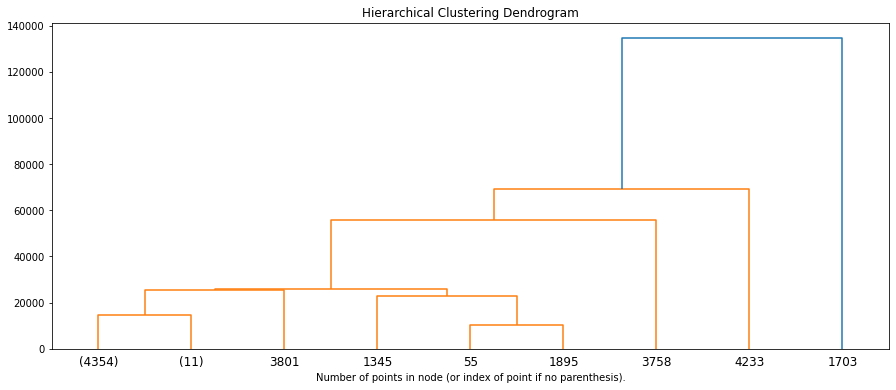

In [24]:
plt.figure(figsize=(15, 6))
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0,
                                n_clusters=None,
                                linkage='single')

model = model.fit(custumer_data.drop(columns=['CustomerID']))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).");

In [25]:
label = AgglomerativeClustering(n_clusters=4,
                                linkage='ward').fit_predict(custumer_data.drop(columns=['CustomerID']))


In [26]:
custumer_data['cluster'] = label

In [27]:
custumer_data[custumer_data['cluster'] == 0]

,CustomerID,#invoce,mean_tot_price,sum_tot_price,#item,tot_items,mean_items_per_ivoce,customer_life_time,cluster
55,12415.0,778,159.030141,123725.45,444,77242,99.282776,340,0
330,12748.0,4642,6.262839,29072.10,1769,24210,5.215424,697,0
458,12931.0,102,328.066765,33462.81,29,23377,229.186275,358,0
568,13089.0,1857,30.902466,57385.88,636,30787,16.578891,577,0
1005,13694.0,585,107.099316,62653.10,369,61803,105.646154,697,0
1078,13798.0,439,82.805057,36351.42,115,23514,53.562642,665,0
1295,14088.0,590,85.449983,50415.49,379,12593,21.344068,323,0
1300,14096.0,5128,11.139023,57120.91,1121,16335,3.185452,304,0
1345,14156.0,1420,79.847986,113384.14,716,57025,40.158451,666,0
1447,14298.0,1640,31.013683,50862.44,884,58021,35.378659,361,0


In [28]:
custumer_data[custumer_data['cluster'] == 1]

,CustomerID,#invoce,mean_tot_price,sum_tot_price,#item,tot_items,mean_items_per_ivoce,customer_life_time,cluster
0,12346.0,2,0.000000,0.00,1,0,0.000000,326,1
1,12347.0,182,23.681319,4310.00,103,2458,13.505495,516,1
2,12348.0,31,57.975484,1797.24,22,2341,75.516129,358,1
3,12349.0,73,24.076027,1757.55,73,631,8.643836,19,1
4,12350.0,17,19.670588,334.40,17,197,11.588235,311,1
...,...,...,...,...,...,...,...,...,...
4367,18280.0,10,18.060000,180.60,10,45,4.500000,160,1
4368,18281.0,7,11.545714,80.82,7,54,7.714286,4,1
4369,18282.0,13,13.584615,176.60,12,98,7.538462,301,1
4370,18283.0,756,2.771005,2094.88,263,1397,1.847884,321,1


In [29]:
custumer_data[custumer_data['cluster'] == 2]

,CustomerID,#invoce,mean_tot_price,sum_tot_price,#item,tot_items,mean_items_per_ivoce,customer_life_time,cluster
1703,14646.0,2085,134.047492,279489.02,703,196719,94.349640,355,2
3758,17450.0,351,534.137236,187482.17,127,69029,196.663818,516,2
4233,18102.0,433,592.236697,256438.49,151,64122,148.087760,516,2


In [30]:
custumer_data[custumer_data['cluster'] == 3]

,CustomerID,#invoce,mean_tot_price,sum_tot_price,#item,tot_items,mean_items_per_ivoce,customer_life_time,cluster
50,12409.0,114,96.990614,11056.93,91,5543,48.622807,118,3
71,12433.0,420,31.847310,13375.87,219,11071,26.359524,697,3
100,12471.0,531,35.293635,18740.92,152,7965,15.000000,666,3
106,12477.0,308,42.587695,13117.01,192,3620,11.753247,342,3
157,12540.0,481,27.669522,13309.04,278,6677,13.881497,362,3
...,...,...,...,...,...,...,...,...,...
3925,17675.0,721,27.875312,20098.10,240,8278,11.481276,516,3
3927,17677.0,321,50.527165,16219.22,179,9725,30.295950,546,3
3973,17735.0,690,19.000029,13110.02,319,8439,12.230435,516,3
4053,17857.0,56,477.916786,26763.34,19,19086,340.821429,454,3
